##IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
for files in os.listdir('C:\\Users\\Shalin N\\Desktop\\drive'):
  print(files)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Shalin N\\Desktop\\drive'

In [14]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import gensim
import os,sys
import matplotlib.pyplot as plt
import shutil
import re,string
import copy
!pip install PyPDF2
import PyPDF2
!pip install pdfminer.six
from pdfminer.high_level import extract_text # to extract text from pdf by blocks
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.4 MB/s eta 0:00:00


##Extracting the abstract part from research papers

In [17]:
abstracts = [] #contains all abstracts
for files in os.listdir('/content/sample_data/datasset'):
  text = extract_text('/content/sample_data/datasset/'+ files) # for extracting text from pdf #string
  text_by_lines =  text.split('\n') # contains text by lines #list

  # to extract abstract
  # if the text that was extracted contains the heading abstract then this code will extract the abstract paragraph from the whole paper
  if ('abstract' in text.lower()) or ('a b s t r a c t' in text.lower()):
    start = 0
    end = 1
    for i, line in enumerate(text_by_lines):
      if ('a b s t r a c t' in line.lower()) or ('abstract' in line.lower()):
        start = i
        break
    for i, line in enumerate(text_by_lines[start:]):
      if ('introduction' in line.lower()) or ('content' in line.lower()) or ('c o n t e n t' in line.lower()) or ('i n t r o d u c t i o n' in line.lower()):
        end = start + i
        break
    if len((" ".join(text_by_lines[start:end])).split())> 50:
      abstracts.append(" ".join(text_by_lines[start:end]))
    else:
      counter = 0
      abstract = []
      for i in text_by_lines: # iterating through each line
        if i != '':
          counter +=1
          abstract.append(i)
        if i == '':
          if counter <8:
            abstract.clear()
            counter = 0
          elif counter >= 8:
            if len((' '.join(abstract)).split())>50:
              break
            else:
              abstract.clear()
              counter = 0
      abstracts.append(' '.join(abstract))


  else: # i.e, if abstract heading is not available in the research paper then it takes the first paragraph as abstract
    counter = 0
    abstract = []
    for i in text_by_lines: # iterating through each line
      if i != '':
        counter +=1
        abstract.append(i)
      if i == '':
        if counter <8:
          abstract.clear()
          counter = 0
        elif counter >= 8:
          if len((' '.join(abstract)).split())>50:
            break
          else:
            abstract.clear()
            counter = 0
    abstracts.append(' '.join(abstract))


In [18]:
all_abstracts = copy.deepcopy(abstracts)

##Creating Dataset using TF-IDF vectorizer

In [19]:
lemmatizer = WordNetLemmatizer()
stop_word = stopwords.words('english')
tfidf = TfidfVectorizer(stop_words= stop_word) # removing stop words
tf_idf_dataset = tfidf.fit_transform(abstracts) # parsing through abstracts
feature_names =  tfidf.get_feature_names_out()

Using Elbow Method to know the optimal no. of clusters.

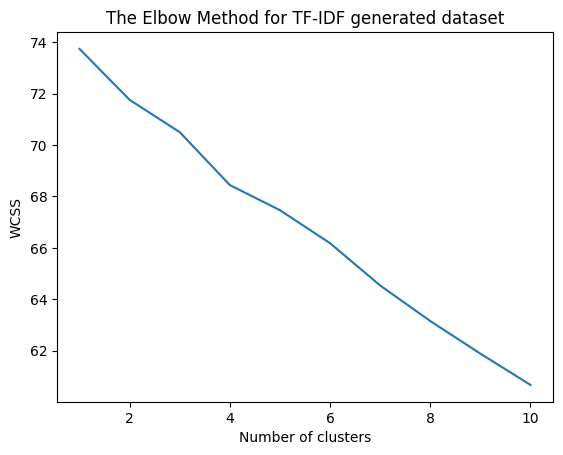

In [20]:
# for TF-IDF generated Dataset
wcss = []

# Running K-means for K values from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tf_idf_dataset)
    wcss.append(kmeans.inertia_)

# Ploting the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for TF-IDF generated dataset')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Sihouette Analysis

For n_clusters = 2, the average silhouette score is: 0.01662684535379242
For n_clusters = 3, the average silhouette score is: 0.017821673623645347
For n_clusters = 4, the average silhouette score is: 0.016678155519784868
For n_clusters = 5, the average silhouette score is: 0.018118044239501127
For n_clusters = 6, the average silhouette score is: 0.020805384746859154
For n_clusters = 7, the average silhouette score is: 0.018525836783189746
For n_clusters = 8, the average silhouette score is: 0.02144007488795911


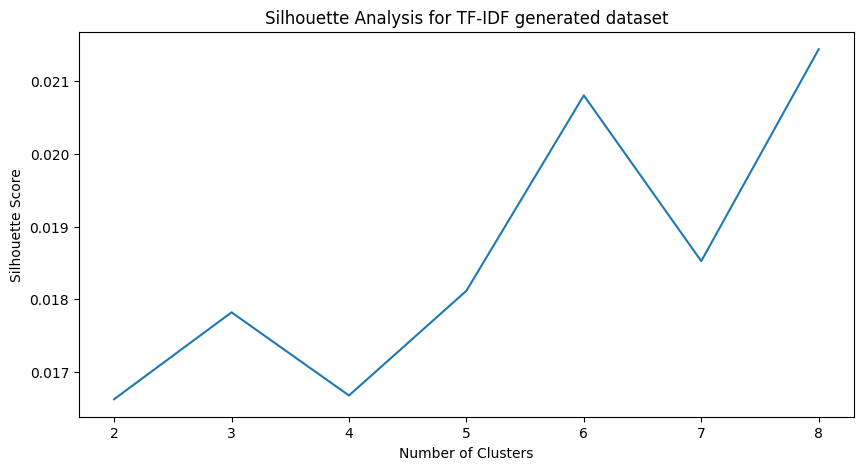

In [21]:
# Load your data into X
X = tf_idf_dataset

# Run K-Means for different number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for TF-IDF generated dataset")
plt.show()

##Davies Bouldin Score

For n_clusters = 2, the average davies_bouldin_score is: 5.118473914441641
For n_clusters = 3, the average davies_bouldin_score is: 4.295049991267437
For n_clusters = 4, the average davies_bouldin_score is: 4.7334207468069955
For n_clusters = 5, the average davies_bouldin_score is: 4.575089537762184
For n_clusters = 6, the average davies_bouldin_score is: 3.904083665004308
For n_clusters = 7, the average davies_bouldin_score is: 3.710261845233179
For n_clusters = 8, the average davies_bouldin_score is: 3.550712347130822


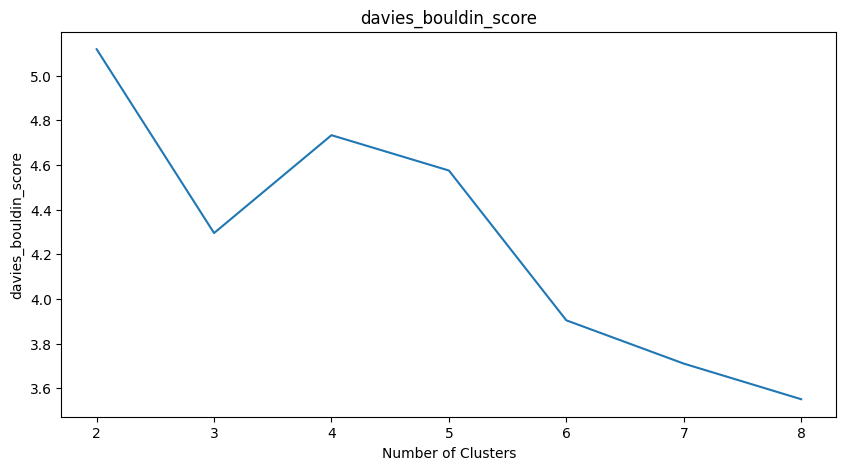

In [23]:
# for TF-IDF generated Dataset
# Load your data into X
X = tf_idf_dataset

# Run K-Means for different number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
davies_bouldin_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    X_dense = tf_idf_dataset.toarray()
    silhouette_avg = davies_bouldin_score(X_dense, cluster_labels)
    davies_bouldin_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average davies_bouldin_score is: {silhouette_avg}")

# Plot the davies_bouldin_score
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, davies_bouldin_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("davies_bouldin_score")
plt.title("davies_bouldin_score")
plt.show()

##DBscan

In [24]:
X = tf_idf_dataset

# Apply DBSCAN clustering
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 0
Estimated number of noise points: 79


DBScan took everything into Noise Points, So it doesnt fit for our case.

##Taking optimal no. of clusters as 3 and proceeding with KMeans Classifier

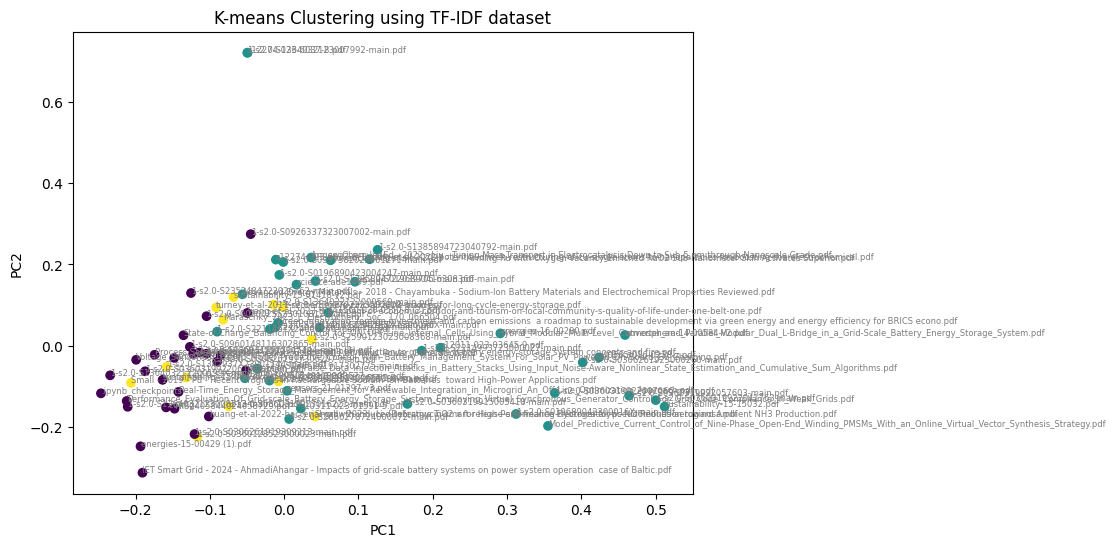

In [27]:
# taking optimal no. of clusters as 3 from both silhouette analysis and Elbow method for TF-IDF genereated dataset.
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(tf_idf_dataset)
labels = kmeans.fit_predict(tf_idf_dataset)

# Reduce dimensionality using PCA

pca = PCA(n_components=2)
X_dense = tf_idf_dataset.toarray()
X_reduced = pca.fit_transform(X_dense)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering using TF-IDF dataset')

# labeling datapoints
for i, title in enumerate(os.listdir('/content')):
    plt.text(X_reduced[i, 0], X_reduced[i, 1], title, fontsize=6, color='#7f7f7f')
plt.show()

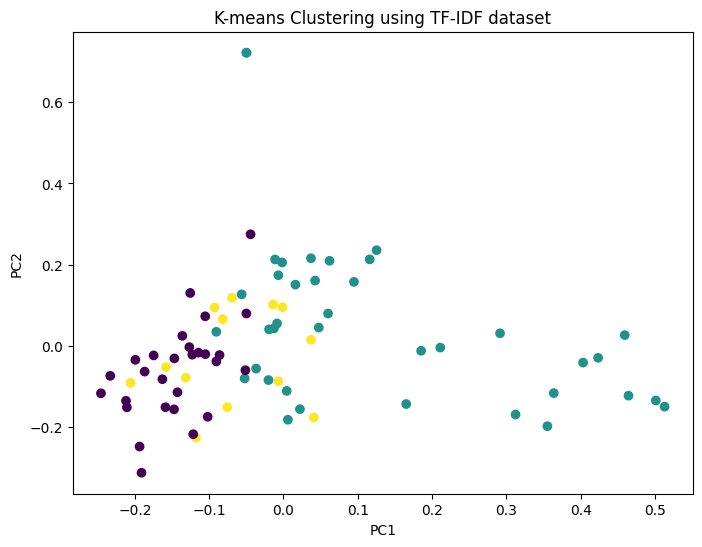

In [28]:
# taking optimal no. of clusters as 3 from both silhouette analysis and Elbow method for TF-IDF genereated dataset.
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(tf_idf_dataset)
labels = kmeans.fit_predict(tf_idf_dataset)

# Reduce dimensionality using PCA

pca = PCA(n_components=2)
X_dense = tf_idf_dataset.toarray()
X_reduced = pca.fit_transform(X_dense)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering using TF-IDF dataset')

plt.show()

##Based on The Graphs that are produced, the best one would be TF-IDF generated dataset and Through K Means clustering the optimal no. of clusters will be 3.

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(tf_idf_dataset)
labels = kmeans.fit_predict(tf_idf_dataset)

In [39]:
# # There are 3 clusters so creating 7 different folders
# num_folders = 3

# for folder_num in range(0, num_folders):
#     folder_path = f"Folder{folder_num}"
#     os.makedirs(folder_path, exist_ok=True)

# # assigning each file to their respecttive folders
# for i, file_name in enumerate(os.listdir('/content/drive/MyDrive/karan')):
#     cluster_num = labels[i]
#     folder_path = f"Folder{cluster_num}"
#     src_file = '/content/drive/MyDrive/karan/'+ file_name
#     dst_file = os.path.join(folder_path, file_name)
#     shutil.copy(src_file, dst_file)

# # saving all items into a csv file

results_df = pd.DataFrame({ 'Paper': os.listdir('/content'), 'Cluster': labels})
results_df.to_csv('output_file.csv', index=False)

In [40]:
from collections import Counter

no_of_files_in_each_folder = dict(Counter(labels))

print(no_of_files_in_each_folder)

{0: 28, 1: 38, 2: 13}


##Explaination Part:
This Code extracts the Abstract part from the research papers.

TF-IDF vectorization method was used to vectorize the Text from each abstract.

Clustering Methods like Kmeans and DBScan were used to make clusters and using Elbow method and silhouette analysis, it was determined that the optimal no. of clusters would be 3 and the model used in creating these clusters was KMeans classifier.

Then all the given research papers were classified based on the clustering labels and were distributed to seperate folders.

It has been verified manually that the classification technique used is correct and the research papers are classified properly.